In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("NewApplications_Lender1_Round1.csv", index_col="id")
past_data = pd.read_csv("PastLoans.csv")

In [3]:
past_data = pd.get_dummies(past_data, columns=['employment'], drop_first=True)

sex_mapping = {'M': 1, 'F': 0}

past_data['sex'] = past_data['sex'].map(sex_mapping)

In [4]:

X = past_data.drop(columns="default")
y = past_data['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [31]:

y_probs = model.predict_proba(X_test)[:, 1]

# can change the threshold to look at different profit scenarios, represents the maximum default risk we take
threshold = 0.05
rate = 0.04  # would be better to actually estimate using each single proposed rate instead of a generic one for all
y_pred = (y_probs >= threshold).astype(int)

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.96      0.44      0.61     18011
           1       0.14      0.84      0.24      1989

    accuracy                           0.48     20000
   macro avg       0.55      0.64      0.43     20000
weighted avg       0.88      0.48      0.57     20000

ROC AUC Score: 0.7103247110677211


Estimated profit (assuming we got all the applicants we predicted not to default): 25200.0


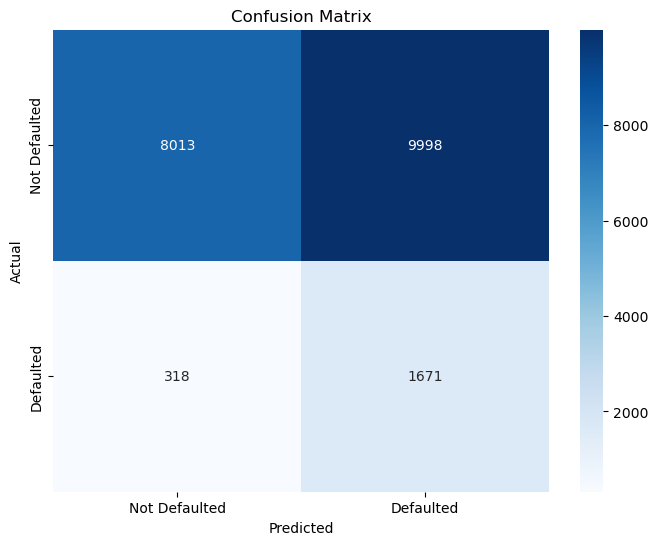

In [32]:
cm = confusion_matrix(y_test, y_pred)

print("Estimated profit (assuming we got all the applicants we predicted not to default):", 10000*rate*cm[0,0] - cm[1,0]*10000)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Defaulted', 'Defaulted'], 
            yticklabels=['Not Defaulted', 'Defaulted'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()